Team members:
1. Deepan Chakravarthi Padmanabhan
2. Mihir Mulye
3. Muhammed Umer Ahmed Khan

## Task 1
Find the parameter $p$ of the binomial distribution using maximum likelihood.  
Given: $n_1$ independent tests of the event A appearing $m_1$ times and $n_2$ independent tests of the event A appiearing $m_2$ times.

## Note:
### The solution of estimating the parameter by manual derivation is attached in the following pages.

## Task 2
Use maximum likelihood to find an estimate for the parameter $\lambda$ for the following
sample set

| X     | 1-3  | 3-5  | 5-7 | 7-9 | 9-11 | 11-13 |13-15 |15-17  |17-19  |
| -----|------| -----| -----| -----| ----- | -----  | -----| -----| -----|
| n     | 5|    6   |   7   |   15   |   22   |   27   |   30   |  34    |   35   |

provided that the corresponding continuous random variable has a density function

$
\[
 f(x) = 
  \begin{cases} 
   \lambda \exp{[\lambda(x-20)]} & x \leq 20 \\
   0       & x > 20
  \end{cases}
\]
$

## Note:
### The solution of estimating the parameter by manual derivation is attached in the following pages.

The value of lambda is : 0.14074650077760498


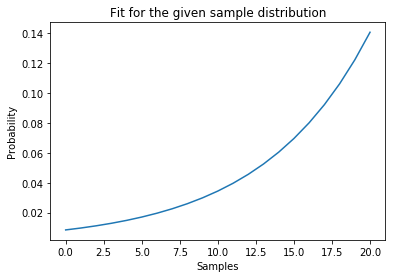

In [7]:
X = np.array([[1,2],[3,4],[5,6],[7,8],[9,10],[11,12],[13,14],[15,16],[17,18]])
n = np.array([5,6,7,15,22,27,30,34,35])

def fx(x, lam):
    return lam*np.exp(lam*(x-20))

# creating a distribution with respect to the provided values
distribution = []
for X_range_index in range(len(X)):
    values = X[X_range_index]    
    for quant in range(n[X_range_index]):
        ran = rand.randrange(0,2)
        # Chose either values from the distribution
        distribution.append(values[1])
        
# Formula derived from theory above
lam = len(distribution) * 1.0 / (20*len(distribution) - np.sum(distribution))

print('The value of lambda is : ' + str(lam))

# Applying function from 0 to 20
x_s = np.arange(21)

# Plot the distribution
plt.plot(fx(np.array(x_s), lam))
plt.xlabel('Samples')
plt.ylabel('Probability')
plt.title('Fit for the given sample distribution')
plt.show()

The sample set contains:  [ 2  2  2  2  2  4  4  4  4  4  4  6  6  6  6  6  6  6  8  8  8  8  8  8
  8  8  8  8  8  8  8  8  8 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12 12 14 14 14 14 14 14 14 14 14 14 14 14 14 14
 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 16 16 16 16 16 16 16 16
 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16
 16 16 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18
 18 18 18 18 18 18 18 18 18 18 18 18 18]  and number of samples (n):  181
Parameter 'Lambda' to fit the given distribution is:  [0.14072266]


/home/deepan/anaconda3/envs/fast/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in log


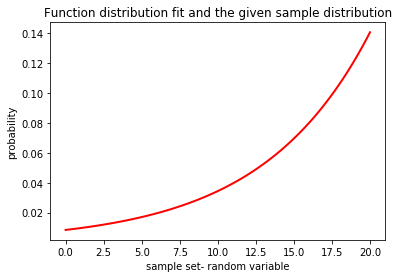

In [8]:
'''The following implementation is carried out using 
the python methods of minimization to find the parameter of the distribution'''


import numpy as np
import matplotlib.pyplot as plt
import random as rand
from scipy.optimize import minimize
from scipy.special import factorial


def fx(x, lam):
    return lam*np.exp(lam*(x-20))


def negLogLikelihood(params, data):
    """ the negative log-Likelohood-Function"""
    lnl = - np.sum(np.log(fx(data, params[0])))
    return lnl

X = np.array([[1,2],[3,4],[5,6],[7,8],[9,10],[11,12],[13,14],[15,16],[17,18]])
n = np.array([5,6,7,15,22,27,30,34,35])

x_s = []

for X_range_index in range(len(X)):
    values = X[X_range_index]    
    for quant in range(n[X_range_index]):
        ran = rand.randrange(0,2)
        x_s.append(values[1])
        

data=np.array(x_s)
print("The sample set contains: ",data,' and number of samples (n): ',data.size)

# minimize the negative log-Likelihood
result= minimize(negLogLikelihood,  # function to minimize
                  x0=np.ones(1),     # start value
                  args=(data,),      # additional arguments for function
                  method='nelder-mead',   # minimization method, see docs
                  )


# result is a scipy optimize result object, the fit parameters 
# are stored in result.x
print("Parameter 'Lambda' to fit the given distribution is: ",result.x)

# Histogram for the given data distribution
# plt.subplot(121)
# plt.hist(data, bins=np.arange(20) - 0.5, density=True)

# plot Function-deviation with fitted parameter
x_plot = np.linspace(0, 20, 100)
# Function distribution for the parameter lambda value estimated
# plt.subplot(122)
plt.plot(x_plot, fx(x_plot, result.x), 'r-', lw=2)
plt.xlabel('sample set- random variable')
plt.ylabel('probability')
plt.title('Function distribution fit and the given sample distribution')
plt.show()

## Task 3

It is known that a random value $X$ has Poisson's distribution $P(X=m)=\frac{a^m}{m!}e^{-a}$, and the parameter $a$ of this distribution is unknown. Using maximum likelihood method and the set of samples $\{x_1,x_2,...,x_8\}$ find the value of $a$.  
$x_1=14, x_2=12, x_3=9, x_4=8, x_5=15, x_6=7, x_7=11 x_8=8, n=30$

Evaluate the result using existing implementation of maximum likelihood or implement the method yourself.

## Note:
### The solution of estimating the parameter by manual derivation is attached in the following pages.

In this below implementation n=8 is considered. However, n value can be customized when you run the program.

The sample set contains:  [14 12  9  8 15  7 11  8]  and number of samples (n):  8
Select n value for the fit(8 or above): 8
Poisson parameter 'a' to fit the given distribution is:  [10.5]


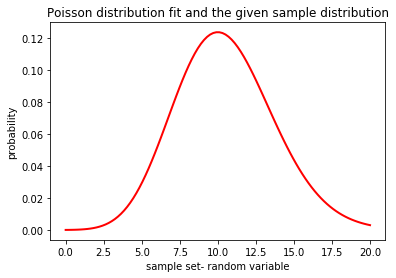

In [3]:
'''The following implementation is carried out using n=8 as the number of samples.
Customize the n for more number of samples of the distribution'''

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.special import factorial


def poisson(k, lamb):
    """poisson pdf, parameter lambda is the fit parameter"""
#     print('lambda value',lamb)
    return (lamb**k/factorial(k)) * np.exp(-lamb)


def negLogLikelihood(params, data):
    """ the negative log-Likelihood-Function"""
    lnl = - np.sum(np.log(poisson(data, params[0])))
#     print("likelihood value",lnl)
    return lnl


# get poisson deviated random numbers
# data = np.random.poisson(2, 30)
data=np.array([14,12,9,8,15,7,11,8])
print("The sample set contains: ",data,' and number of samples (n): ',data.size)
n_value=int(input('Select n value for the fit(8 or above): '))

if n_value==data.size:
    data=data
else:
    data=np.hstack((data,np.zeros((n_value-8,)))) 

# minimize the negative log-Likelihood
result= minimize(negLogLikelihood,  # function to minimize
                  x0=np.ones(1),     # start value
                  args=(data,),      # additional arguments for function
                  method='nelder-mead',   # minimization method, see docs
                  )


# result is a scipy optimize result object, the fit parameters 
# are stored in result.x
print("Poisson parameter 'a' to fit the given distribution is: ",result.x)

# Histogram for the given data distribution
# plt.hist(data, bins=np.arange(15) - 0.5, density=True)

# plot poisson-deviation with fitted parameter
x_plot = np.linspace(0, 20, 100)
# Poisson distribution for the parameter lambda value estimated
plt.plot(x_plot, poisson(x_plot, result.x), 'r-', lw=2)
plt.xlabel('sample set- random variable')
plt.ylabel('probability')
plt.title('Poisson distribution fit and the given sample distribution')
plt.show();

References:
1. Poisson distribution fit, Available at: https://stackoverflow.com/questions/25828184/fitting-to-poisson-histogram

In [188]:
# import math
# X = np.array([14, 12, 9, 8, 15, 7, 11, 8])

# def Poisson(m, a):
#     return math.pow(a,m) * math.exp(-a)/ math.factorial(m)

# # Formula derived from theory
# a = np.sum(X)*1.0/len(X)

# m = np.arange(30)

# dist = []

# for i  in range(30):
#     dist.append(Poisson(i,a))


# plt.plot(dist)
# plt.ylabel("Probability")
# plt.xlabel('Samples')
# plt.title('Distribution fit using the paramter from the formula derived from theory')
# plt.show()

In [26]:
# def f(k, lamb):
#     """poisson pdf, parameter lambda is the fit parameter"""
#     return (lamb**k/factorial(k)) * np.exp(-lamb)

# def Log(params, data):
#     """ the negative log-Likelohood-Function"""
# # Log L = sum(n * log(f|lambda)) - To validate the betterness of the fit
#     final=0
#     for i,n in enumerate(data):
#         final += n*(np.log(f(i, params)))
#     return final

# print("This will serve as the validation for our lambda(m) value obtained\n")
# a=np.linspace(2,5,100)
# likelihood=np.zeros_like(a)
# for i,a1 in enumerate(a):
#     likelihood[i]=Log(a1,data)

# plt.plot(a,likelihood)
# plt.xlabel('Log -likelihood value')
# plt.ylabel('lambda (m) value of the Poisson parameter')
# plt.title('Validation for the obtained parameter')
# print('The likelihood is max at ',a[(np.where(likelihood==max(likelihood))[0])][0],
#       ' obtained by the maximization of neg-log-likelihood')